## Time to get your hands dirty. Handwritten digits.

Sometimes you might want to apply multiple ML techniques. For example, just because you have labels in your training data doesn't mean that a regression algorithm will work very well.  So, you might want to start with a clustering or dimensional reduction algorithm first.

**The goal here it's to familiarize yourself with sklearn and the key ideas behind machine learning. So no worries it's ok if you don't understand the details of the algorithms right now, you'll get them in a few weeks.**


For the exam, this assignment is **optional (not examinable)**.

Here we're going to use the [MNIST database](https://en.wikipedia.org/wiki/MNIST_database). This contains a set of images with handwritten digts. It is one of the most widely used and best studied datasets in the whole of machine learning. It's part of the standard tests new tecniques need to face. 

### Tasks. Part 0.

1) First thing, grab a piece of paper and visually classify those 25 digits. We'll see if you're better or worse than a computer! 

**Spoiler alert: Davide's efficiency was ~80%, much worse than ML!**


2) Here is how you plot the images and the corresponding labels  (The one thing I'm not telling you of course is the random seed I used to select those above). After you've seen this ones, go back to your piece of paper and update your choices if you want. Keep track of both set of preditions. This is like supervised learning.

Ok so the data is simply each pixel value within an $8\times 8$ grid.  For this analysis, we don't care about the $2$-D nature of the image, we can just treat it as an $8\times8=64$ dimensional array. So our data have $1797$ samples in $64$ dimensions.

Then each of the $1797$ ***images*** has a label.

### Tasks. Part 1. Unsupervised Learning: Dimensionality Reduction on Digits

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to plot points in $N=64$ dimensions! So we need to reduce the dimensionality of the space


3) Use the unsupervised dimensionality reduction technique called **[`Isomap`](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html#sklearn.manifold.Isomap)**. Isomap is an embedding tecnique, which tries to understand if your $N$ dimensional datapoint live in a $M$ dimensional (with $M<N$) manyfold. Reduce the MINST dataset.  Do some plots to visualize your results 

*Note*. Isomap is very recent. It was introduced by [Tenenbaum et al (2000)](https://www.science.org/doi/10.1126/science.290.5500.2319) ---a paper that has something like $1.5\times 10^4$ [citations](https://scholar.google.com/scholar?hl=en&as_sdt=0%2C5&q=a+global+geometric+framework+for+nonlinear+dimensionality+reduction&btnG=).

### Tasks. Part 2. Supervised Learning: Classification on Digits

Now we want to classify the dataset. 

4) Split the dataset taking 80% of the images as tranining dataset and leaving the other 20% as a validation set. You need `sklearn.model_selection.train_test_split`.

5) Use a simple [`Logistic Regression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) which despite its name is a common classification algorithm. (I know, this is confusing!). Use the flag `solver='sag'` (I found the default solver had a bug, at least when I tried).

6) Compute the accuracy (`sklearn.metrics.accuracy_score`) of your emulator. In this context, accuracy is simply the fraction of the digits that were correctly identified. Compute the accuracy on both the training and the validation set. Comment on the results.

7) The accuracy is a single number doesn't tell us ***where*** we've gone wrong. Plot the ***confusion matrix*** as we did above. What are the digits that are more challenging to identify, does it make sense?


There are many ways to improve this classifier, for example using a more sophisticated model, use cross validation, etc.  We'll get to those in the coming weeks.

In [1]:
# LECTURE 13 ->  use the MNIST database. This contains a set of images with handwritten digts.

# > OPTIONAL

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn import datasets
from sklearn.manifold import Isomap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
# load dataset
digits = datasets.load_digits()
print(digits.images.shape)
print(digits.keys())

print(digits.DESCR) # Data Set Characteristics

(1797, 8, 8)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into 

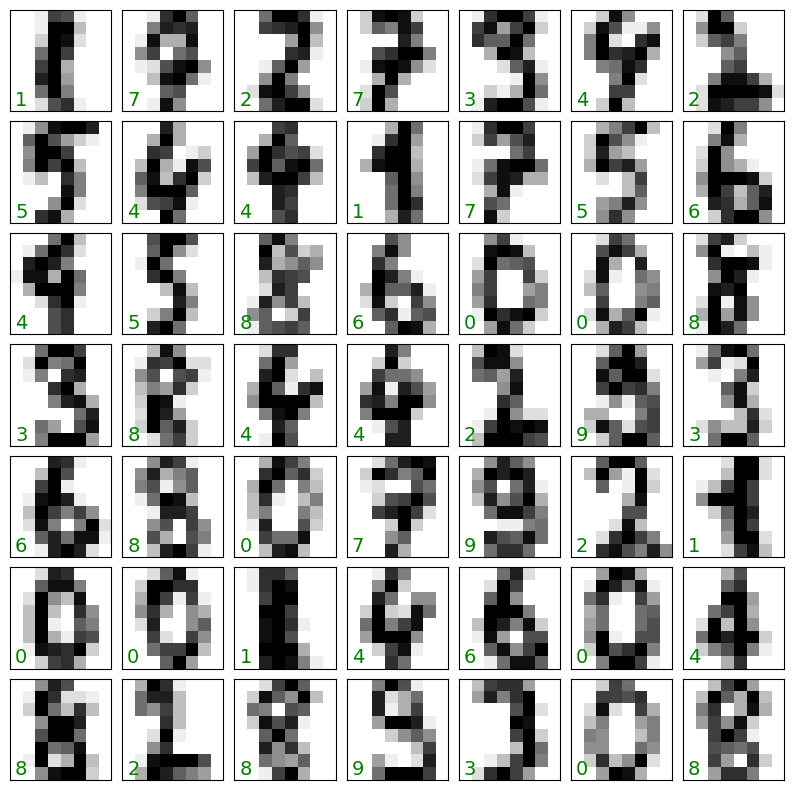

In [4]:
# > TASK 0
# plot the images and the corresponding labels
fig, axes = plt.subplots(7,7, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(42)
n = 100
mychoices = np.random.choice(digits.images.shape[0],n) # indices of the samples randomly chosen from the dataset

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), 
              cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

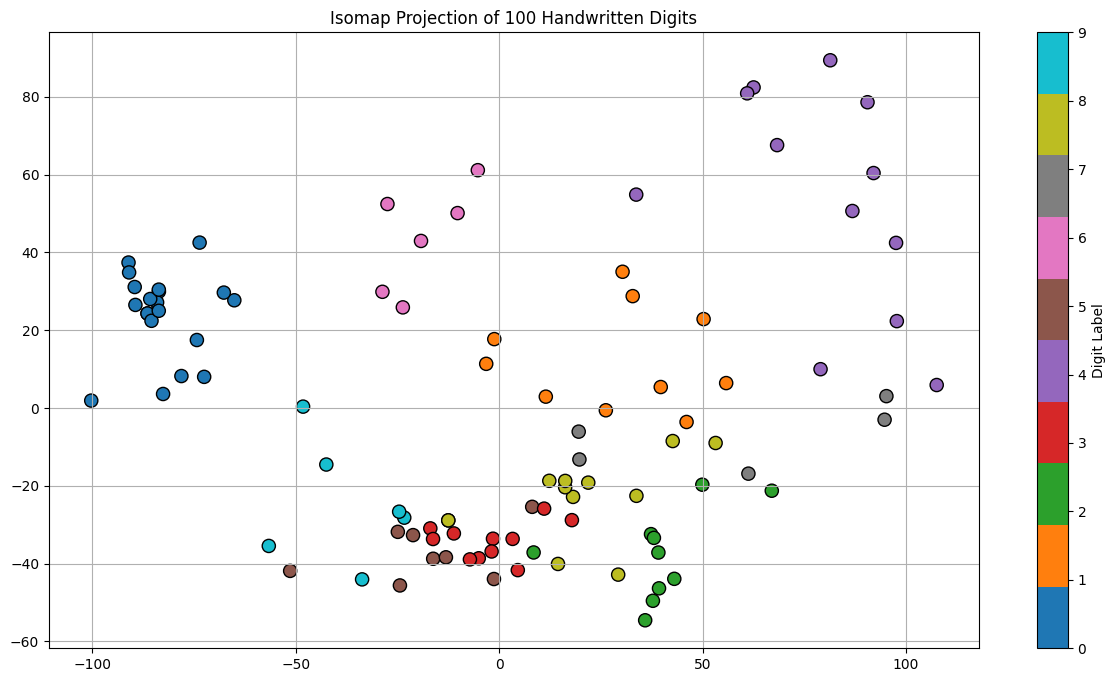

In [5]:
# > TASK 1: 64-dimensional parameter space, 8x8 pixels -> need to reduce the dimensionality (on the corners pixel are usually white)
# UNSUPERVISED DIMENSIONALITY REDUCTION TECHNIQUE -> Isomap
X = digits.data[mychoices]  # data -> (n_samples, n_features) = (100, 64): 100 images + 64 pixels for each image 
Y = digits.target[mychoices]

# number of neighbors and number of points n influence how much the points are clustered 
embedding = Isomap(n_neighbors=7, n_components=2) # n_components = 2 -> 2D preserving local geometry (distances between nearby points)
X_transformed = embedding.fit_transform(X)  

# Formatter for colorbar labels
formatter = plt.FuncFormatter(lambda i, *args: str(int(i)))

plt.figure(figsize=(15, 8))
scatter = plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=Y, cmap=matplotlib.colormaps['tab10'], edgecolor='k', s=90)

cbar = plt.colorbar(scatter, ticks=range(10), format=formatter)
cbar.set_label('Digit Label')

plt.title(f'Isomap Projection of {n} Handwritten Digits')
plt.grid(True)
plt.show()

In [6]:
# TASK 2: SUPERVISED LEARNING -> CLASSIFICATION

# Split the dataset taking 80% of the images as tranining dataset and the other 20% as a validation set
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y,test_size=0.2, train_size=0.8)

# Logistic Regression -> common classification algorithm
# Solver='sag' -> algorithm to use in the optimization problem, faster for large sets -> only 100 -> max_iter (maximum number of iteraction to find right parameters)
clssif = LogisticRegression(random_state=0, solver='sag',  max_iter=2000)
# clssif = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000)
clssif.fit(Xtrain, Ytrain) # training the model on the train dataset

Ypred_train = clssif.predict(Xtrain)
Ypred_test = clssif.predict(Xtest)

# Accuracy of the emulator -> fraction of the digits correctly identified
# Plot the confusion matrix 

print()

print("TRAINING SET:")
print("Accuracy:", accuracy_score(Ytrain, Ypred_train)) # = 1 -> model makes predictions on the same set it was trained on
print("Confusion Matrix:\n", confusion_matrix(Ytrain, Ypred_train))

print()

print("TEST SET:")
print("Accuracy:", accuracy_score(Ytest, Ypred_test))
print("Confusion Matrix:\n", confusion_matrix(Ytest, Ypred_test, labels=range(10))) # range(10) -> only 7 different classes out of 10 possible
print("Classes found in test set:", np.unique(Ytest))

# CONFUSION MATRIX: each row is the true number, each column is the predicted number


TRAINING SET:
Accuracy: 1.0
Confusion Matrix:
 [[13  0  0  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0]
 [ 0  0  0  0  8  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0  5  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0]
 [ 0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0  0  6]]

TEST SET:
Accuracy: 0.9
Confusion Matrix:
 [[7 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 0]]
Classes found in test set: [0 1 3 4 5 6 8]
